Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Dataset

In [4]:
df = pd.read_csv("../house-prices-advanced-regression-techniques/test.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Basic Dataset Information

In [5]:
df.shape

(1459, 80)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Identify Missing Values

In [7]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
GarageCars         1
Exterior1st        1
GarageArea         1
SaleType           1
dtype: int64

Visualize Missing Values

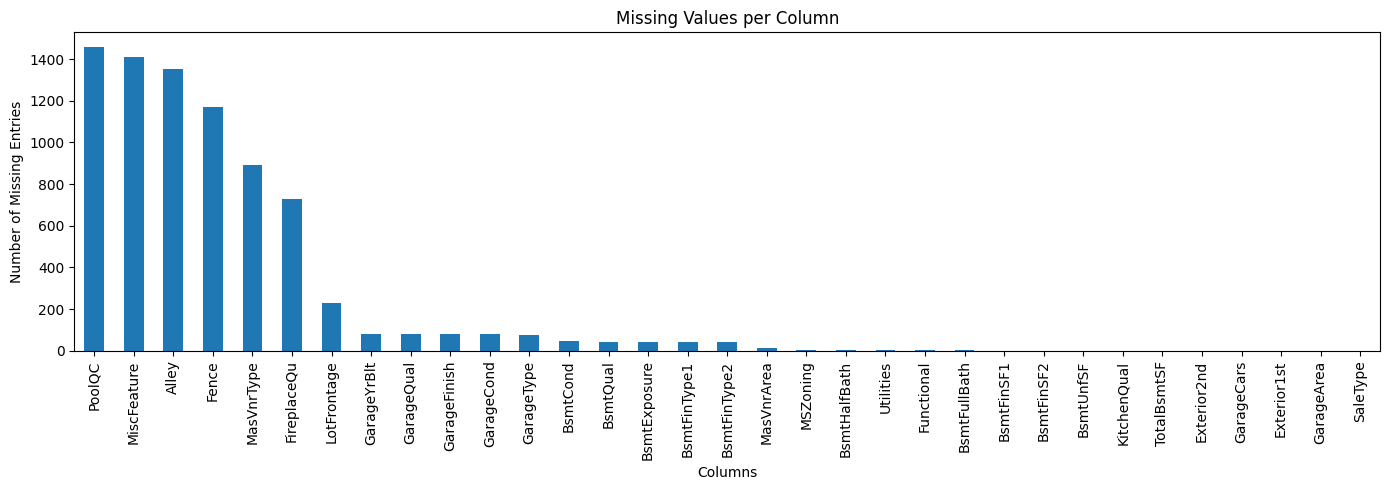

In [8]:
plt.figure(figsize=(14,5))
missing_values[missing_values > 0].plot(kind='bar')
plt.title("Missing Values per Column")
plt.ylabel("Number of Missing Entries")
plt.xlabel("Columns")
plt.tight_layout()
plt.show()

Remove Columns with Excessive Missing Data

In [9]:
threshold = 0.60
df = df.loc[:, df.isnull().mean() < threshold]
df.shape

(1459, 75)

Separate Numerical and Categorical Columns

In [10]:
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

Handle Numerical Missing Values (Median)

In [11]:
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

Handle Categorical Missing Values (Mode)

In [12]:
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

Validation After Cleaning

In [13]:
df.isnull().sum().sum()

np.int64(0)

Dataset Shape After Cleaning

In [14]:
df.shape

(1459, 75)

Save Cleaned Dataset

In [16]:
df.to_csv("../house-prices-advanced-regression-techniques/cleaned_house_prices.csv", index=False)